In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import math
%matplotlib inline

In [2]:
scores = pd.read_csv(r'C:\Users\12156\JupyterNotebooks\School_Achievement_2015.csv')
funding = pd.read_csv(r'C:\Users\12156\JupyterNotebooks\School_Funding_2015.csv')

In [3]:
scores.head()

,Jurisdiction,Agency_ID,#_Students,M_4,M_4_AB,M_4_AP,M_8,M_8_AB,M_8_AP,R_4,...,%_IEP,%_Lim_Eng,%_Lunch,%_White,%_Black,%_Hispanic,%_Asian,Pupil_Teacher,#_Schools,#_Charters
0,New York City,3620580,984462,231,73,26,275,62,27,214,...,23.95,14.46,67.56,15.94,23.54,40.92,16.77,13.00,1542,216.0
1,Los Angeles,622710,633621,224,64,22,263,52,15,204,...,13.53,20.85,78.57,10.07,8.34,73.98,5.59,22.56,1012,279.0
2,Chicago,1709930,378199,232,71,30,275,62,25,213,...,13.70,15.93,83.48,10.00,37.73,46.63,3.93,19.89,585,43.0
3,Miami-Dade,1200390,357249,242,86,41,274,64,26,226,...,9.89,20.59,70.82,7.05,21.10,70.08,1.11,17.11,528,127.0
4,Houston,4823640,216106,239,80,36,276,65,27,210,...,7.15,28.54,76.98,8.75,23.93,62.07,3.86,18.72,287,33.0


In [4]:
funding.head()

,District,State,Agency_ID,Students,TOTALREV,TLOCREV,TSTREV,TFEDREV,TOTALEXP,TOTALREV_PUPIL,TLOCREV_PUPIL,TSTREV_PUPIL,TFEDREV_PUPIL
0,NYC CHANCELLOR'S OFFICE,New York,3620580.0,981667.0,2.744836e+10,1.514124e+10,1.056801e+10,1.739101e+09,2.962010e+10,27961.0,15424.0,10765.0,1772.0
1,LOS ANGELES UNIFIED,California,622710.0,639337.0,1.032938e+10,2.506605e+09,6.731375e+09,1.091400e+09,9.686165e+09,16156.0,3921.0,10529.0,1707.0
2,CITY OF CHICAGO SD 299,Illinois,1709930.0,387311.0,5.272668e+09,2.849460e+09,1.630788e+09,7.924200e+08,5.963039e+09,13614.0,7357.0,4211.0,2046.0
3,DADE,Florida,1200390.0,357579.0,3.590773e+09,2.058336e+09,1.100918e+09,4.315190e+08,3.654722e+09,10042.0,5756.0,3079.0,1207.0
4,CLARK COUNTY SCHOOL DISTRICT,Nevada,3200060.0,325990.0,3.220684e+09,1.938496e+09,1.004560e+09,2.776280e+08,3.081183e+09,9880.0,5946.0,3082.0,852.0


## Part 1: Overview

In this section I will run some basic functions to better understand the dataset

In [5]:
scores['Jurisdiction'].count()

21

In [6]:
funding['District'].count()

18680

In [7]:
scores.iloc[:,0:15].describe()

,Agency_ID,#_Students,M_4,M_4_AB,M_4_AP,M_8,M_8_AB,M_8_AP,R_4,R_4_AB,R_4_AP,R_8,R_8_AB,R_8_AP
count,2.100000e+01,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2.504622e+06,197548.904762,231.285714,70.809524,29.285714,269.523810,56.761905,22.380952,211.619048,56.047619,25.380952,253.380952,62.857143,22.619048
std,1.492557e+06,230319.552248,11.433035,13.883872,12.321294,10.911549,11.687193,8.930152,11.482492,13.124314,10.346382,8.529221,9.456668,8.089970
min,6.145500e+05,39017.000000,205.000000,36.000000,5.000000,244.000000,27.000000,4.000000,186.000000,27.000000,6.000000,237.000000,44.000000,7.000000
25%,1.200480e+06,73356.000000,224.000000,64.000000,22.000000,263.000000,51.000000,17.000000,204.000000,47.000000,17.000000,248.000000,58.000000,17.000000
50%,2.400090e+06,128040.000000,232.000000,73.000000,31.000000,272.000000,61.000000,22.000000,213.000000,56.000000,26.000000,252.000000,62.000000,20.000000
75%,3.702970e+06,214386.000000,239.000000,82.000000,36.000000,276.000000,64.000000,27.000000,220.000000,65.000000,35.000000,261.000000,70.000000,31.000000
max,4.823640e+06,984462.000000,248.000000,87.000000,51.000000,286.000000,71.000000,39.000000,230.000000,76.000000,41.000000,265.000000,77.000000,33.000000


In [8]:
scores.iloc[:,15:].describe()

,%_IEP,%_Lim_Eng,%_Lunch,%_White,%_Black,%_Hispanic,%_Asian,Pupil_Teacher,#_Schools,#_Charters
count,21.000000,21.000000,18.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,20.000000
mean,14.055714,15.962381,73.091111,17.349524,35.700952,38.644762,5.014762,16.511429,313.428571,64.500000
std,4.442024,9.251882,14.447534,11.123837,24.886969,23.862109,4.374071,3.448800,355.818573,72.209855
min,7.150000,3.760000,52.030000,2.480000,2.500000,7.050000,1.010000,11.100000,89.000000,3.000000
25%,10.570000,10.230000,59.995000,9.950000,21.100000,15.730000,1.590000,13.820000,118.000000,19.750000
50%,13.930000,14.460000,73.720000,14.310000,31.910000,40.920000,3.860000,16.160000,175.000000,38.000000
75%,16.640000,20.850000,82.252500,22.920000,50.890000,62.070000,6.330000,17.750000,287.000000,69.750000
max,23.950000,40.430000,100.000000,44.950000,80.730000,73.980000,16.770000,23.170000,1542.000000,279.000000


## Time to Merge, before we evaluate funding

In [9]:
combined1 = scores.join(funding.set_index('Agency_ID'), on='Agency_ID')

In [10]:
combined1.iloc[:,27:].describe()

,Students,TOTALREV,TLOCREV,TSTREV,TFEDREV,TOTALEXP,TOTALREV_PUPIL,TLOCREV_PUPIL,TSTREV_PUPIL,TFEDREV_PUPIL
count,21.000000,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,21.000000,21.000000,21.000000,21.000000
mean,198225.666667,3.420359e+09,1.673743e+09,1.416131e+09,3.304850e+08,3.544943e+09,15971.571429,8072.000000,6103.952381,1795.714286
std,230633.855863,5.909450e+09,3.178647e+09,2.515212e+09,4.072150e+08,6.325706e+09,5953.968211,5849.174549,3566.355275,785.236088
min,39410.000000,7.335430e+08,1.237230e+08,0.000000e+00,7.719500e+07,8.074060e+08,9379.000000,1684.000000,0.000000,999.000000
25%,73460.000000,1.211671e+09,4.695870e+08,3.703310e+08,1.207710e+08,1.263152e+09,11502.000000,3635.000000,3736.000000,1286.000000
50%,129192.000000,1.420023e+09,9.799740e+08,6.591230e+08,1.559850e+08,1.432818e+09,13839.000000,7022.000000,5219.000000,1601.000000
75%,211923.000000,2.480131e+09,1.283208e+09,1.057819e+09,2.939580e+08,2.736150e+09,17989.000000,9573.000000,9240.000000,1923.000000
max,981667.000000,2.744836e+10,1.514124e+10,1.056801e+10,1.739101e+09,2.962010e+10,27961.000000,24305.000000,11600.000000,4160.000000


In [11]:
#What is the biggest school district by students? How many students
def q1_biggest_sd(combined1):
    
    biggest_sd = combined1.loc[combined1['Students'].idxmax()]
    
    print({biggest_sd['Jurisdiction']})
    
    print({biggest_sd['Students']})

In [12]:
q1_biggest_sd(combined1)

{'New York City'}
{981667.0}


In [13]:
#Which school districts have the most and least funding?
def q2_most_funding(combined1):
    
    most_funding = combined1.loc[combined1['TOTALREV'].idxmax()]
    
    most_funding_pupil = combined1.loc[combined1['TOTALREV_PUPIL'].idxmax()]
    
    least_funding = combined1.loc[combined1['TOTALREV'].idxmin()]
    
    least_funding_pupil = combined1.loc[combined1['TOTALREV_PUPIL'].idxmin()]
    
    print(f"The most total funding is in {most_funding['Jurisdiction']} at ${most_funding['TOTALREV']}")
      
    print(f"The most funding per pupil is in {most_funding_pupil['Jurisdiction']} at ${most_funding_pupil['TOTALREV_PUPIL']}")  
      
    print(f"The least total funding is in {least_funding['Jurisdiction']} at ${least_funding['TOTALREV']}")
          
    print(f"The least funding per pupil is in {least_funding_pupil['Jurisdiction']} at ${least_funding_pupil['TOTALREV_PUPIL']}")   

In [14]:
q2_most_funding(combined1)

The most total funding is in New York City at $27448356000.0
The most funding per pupil is in New York City at $27961.0
The least total funding is in Cleveland at $733543000.0
The least funding per pupil is in Duval County (FL) at $9379.0


In [15]:
#Create a new column to determine budget surplus/ deficit
combined1['deficit'] = combined1['TOTALEXP'] - combined1['TOTALREV']

In [16]:
#Who has the biggest suprlus and deficit
def q3_deficit(combined1):
    
    small_deficit = combined1.loc[combined1['deficit'].idxmax()]
    
    big_deficit = combined1.loc[combined1['deficit'].idxmin()]
    
    print(f"The largest budget surplus is in {small_deficit['Jurisdiction']} at ${small_deficit['deficit']}")
    
    print(f"The largest budget deficit is in {big_deficit['Jurisdiction']} at ${big_deficit['deficit']}")

In [17]:
q3_deficit(combined1)

The largest budget surplus is in New York City at $2171742000.0
The largest budget deficit is in Los Angeles at $-643215000.0


In [18]:
#Where are the best and worst scores?
def q4_bestscores(combined1): 
    
    best_math4 = combined1.loc[combined1['M_4'].idxmax()]
    
    best_math8 = combined1.loc[combined1['M_8'].idxmax()]
    
    best_read4 = combined1.loc[combined1['R_4'].idxmax()]
    
    best_read8 = combined1.loc[combined1['R_8'].idxmax()]
    
    print({best_math4['Jurisdiction']})
    print({best_math8['Jurisdiction']})
    print({best_read4['Jurisdiction']})
    print({best_read8['Jurisdiction']})

In [19]:
q4_bestscores(combined1)

{'Charlotte'}
{'Charlotte'}
{'Hillsborough County (FL)'}
{'Miami-Dade'}


In [20]:
def q4_worstscores(combined1): 
    
    worst_math4 = combined1.loc[combined1['M_4'].idxmin()]
    
    worst_math8 = combined1.loc[combined1['M_8'].idxmin()]
    
    worst_read4 = combined1.loc[combined1['R_4'].idxmin()]
    
    worst_read8 = combined1.loc[combined1['R_8'].idxmin()]
    
    print({worst_math4['Jurisdiction']})
    print({worst_math8['Jurisdiction']})
    print({worst_read4['Jurisdiction']})
    print({worst_read8['Jurisdiction']})

In [21]:
q4_worstscores(combined1)

{'Detroit'}
{'Detroit'}
{'Detroit'}
{'Detroit'}


In [22]:
#Creating 3 new columns for average scores, average math scores, and average reading scores

In [23]:
combined1['Avg_Score'] = combined1[['M_4','M_8','R_4','R_8']].mean(axis=1)

In [24]:
combined1['Avg_Math'] = combined1[['M_4','M_8']].mean(axis=1)

In [25]:
combined1['Avg_Read'] = combined1[['R_4','R_8']].mean(axis=1)

In [26]:
#running correlations across subjects and grade levels
def q5_correlations(combined1): 
    
    math_corr = np.corrcoef(combined1['M_4'], combined1['M_8'])
    print(f"Math Correlations")
    print(math_corr)
    print(f"r={math_corr[0][1]:.2f}")
    
    read_corr = np.corrcoef(combined1['R_4'], combined1['R_8'])
    print(f"Reading Correlations")
    print(read_corr)
    print(f"r={read_corr[0][1]:.2f}")
    
    mathread_corr = np.corrcoef(combined1['Avg_Math'], combined1['Avg_Read'])
    print(f"Math and Reading Correlations")
    print(mathread_corr)
    print(f"r={mathread_corr[0][1]:.2f}")  
    
    fundingscore_corr = np.corrcoef(combined1['Avg_Score'], combined1['TOTALREV_PUPIL'])
    print(f"Total funding per pupil and Average Scores Correlations")
    print(fundingscore_corr)
    print(f"r={fundingscore_corr[0][1]:.2f}") 

In [27]:
q5_correlations(combined1)

Math Correlations
[[1.         0.87367538]
 [0.87367538 1.        ]]
r=0.87
Reading Correlations
[[1.         0.92000615]
 [0.92000615 1.        ]]
r=0.92
Math and Reading Correlations
[[1.         0.91218097]
 [0.91218097 1.        ]]
r=0.91
Total funding per pupil and Average Scores Correlations
[[ 1.       -0.334292]
 [-0.334292  1.      ]]
r=-0.33


Text(0.5, 0.98, 'Box Plot - Math Scores')

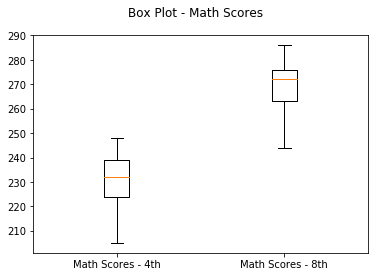

In [28]:
plt.boxplot([combined1["M_4"], combined1["M_8"]])
plt.xticks([1,2],["Math Scores - 4th", "Math Scores - 8th"])
plt.suptitle("Box Plot - Math Scores")

## Part II: Data Visualization

How are the scores distributed?

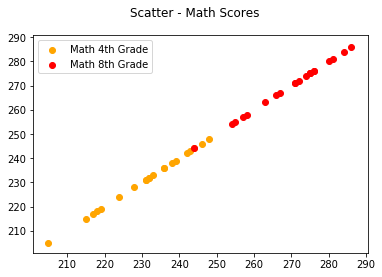

In [29]:
plt.scatter(combined1.M_4, combined1.M_4, color = "orange")
plt.scatter(combined1.M_8, combined1.M_8, color = 'r')
plt.suptitle("Scatter - Math Scores")
plt.legend(["Math 4th Grade", "Math 8th Grade"])

Text(0.5, 0.98, 'Box Plot - Reading Scores')

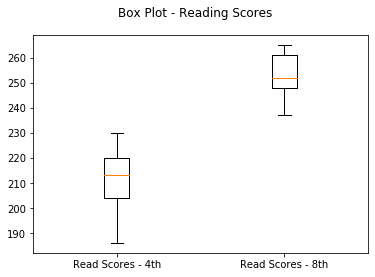

In [30]:
plt.boxplot([combined1["R_4"], combined1["R_8"]])
plt.xticks([1,2],["Read Scores - 4th", "Read Scores - 8th"])
plt.suptitle("Box Plot - Reading Scores")

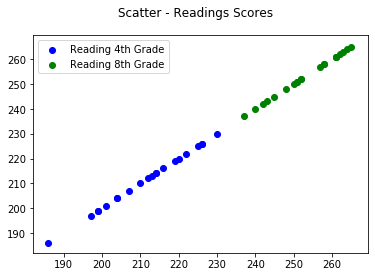

In [31]:
plt.scatter(combined1.R_4, combined1.R_4, color = "blue")
plt.scatter(combined1.R_8, combined1.R_8, color = "green")
plt.suptitle("Scatter - Readings Scores")
plt.legend(["Reading 4th Grade", "Reading 8th Grade"])

Racial Backgrounds

In [32]:
combined1['%_Other'] = 100 - combined1[["%_White","%_Black","%_Hispanic","%_Asian"]].sum(axis=1)

In [33]:
plot_race = combined1[["%_White","%_Black","%_Hispanic","%_Asian","%_Other"]].mean()

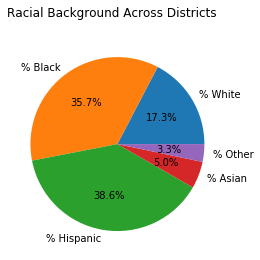

In [34]:
labels = '% White','% Black','% Hispanic', '% Asian', '% Other'
plt.pie(plot_race, labels=labels, autopct='%1.1f%%')
plt.suptitle("Racial Background Across Districts")
plt.show()

Public Schools, Students, Teachers, and Charters

Text(0.5, 0.98, 'Students and Schools per District')

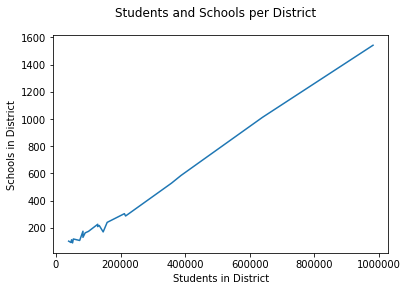

In [35]:
plt.plot(combined1.Students, combined1['#_Schools'])
plt.xlabel("Students in District")
plt.ylabel("Schools in District")
plt.suptitle("Students and Schools per District")

In [36]:
combined1['StatevCharter'] = combined1['#_Schools']/combined1['#_Charters']

Text(0.5, 0.98, 'School to Charter Ratio and Standardized Scores')

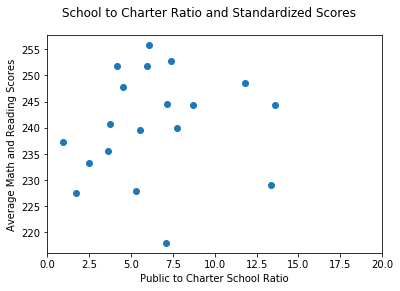

In [37]:
plt.scatter(combined1['StatevCharter'], combined1['Avg_Score'])
plt.xlabel("Public to Charter School Ratio")
plt.ylabel("Average Math and Reading Scores")
plt.xlim(0,20)
plt.suptitle("School to Charter Ratio and Standardized Scores")


Text(0.5, 0.98, 'Student Teacher Ratio and Standardized Scores')

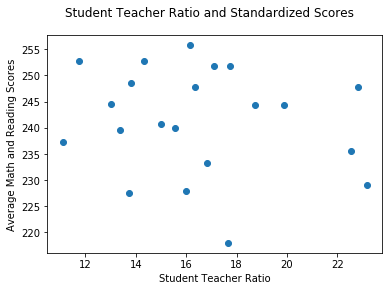

In [38]:
plt.scatter(combined1['Pupil_Teacher'], combined1['Avg_Score'])
plt.xlabel("Student Teacher Ratio")
plt.ylabel("Average Math and Reading Scores")
plt.suptitle("Student Teacher Ratio and Standardized Scores")

Funding and Standardized Test Scores

Text(0.5, 0.98, 'School Funding and Standardized Scores')

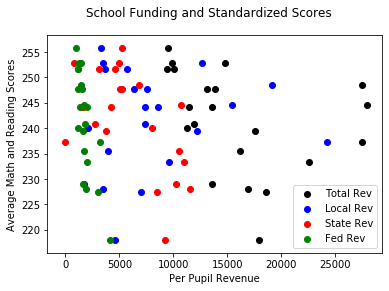

In [39]:
plt.scatter(combined1['TOTALREV_PUPIL'], combined1['Avg_Score'], color="black")
plt.scatter(combined1['TLOCREV_PUPIL'], combined1['Avg_Score'], color="blue")
plt.scatter(combined1['TSTREV_PUPIL'], combined1['Avg_Score'], color="red")
plt.scatter(combined1['TFEDREV_PUPIL'], combined1['Avg_Score'], color="green")
plt.legend(["Total Rev", "Local Rev", "State Rev", "Fed Rev"])
plt.xlabel("Per Pupil Revenue")
plt.ylabel("Average Math and Reading Scores")
plt.suptitle("School Funding and Standardized Scores")

Text(0.5, 0.98, 'Total Revenue per Pupil Histogram')

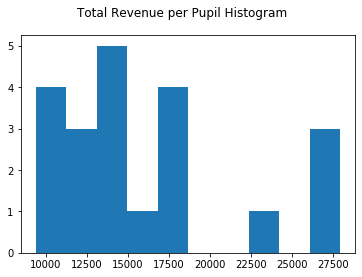

In [40]:
plt.hist(combined1['TOTALREV_PUPIL'],bins=10)
plt.suptitle("Total Revenue per Pupil Histogram")

Text(0.5, 0.98, 'School Funding and Standardized Scores')

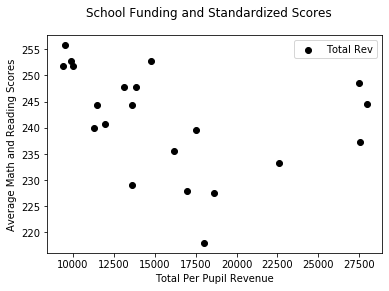

In [41]:
plt.scatter(combined1['TOTALREV_PUPIL'], combined1['Avg_Score'], color="black")
plt.legend(["Total Rev"])
plt.xlabel("Total Per Pupil Revenue")
plt.ylabel("Average Math and Reading Scores")
plt.suptitle("School Funding and Standardized Scores")

Text(0.5, 0.98, 'School Funding and Standardized Scores')

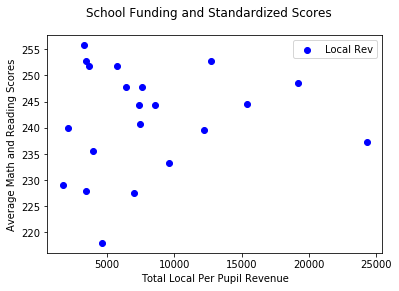

In [42]:
plt.scatter(combined1['TLOCREV_PUPIL'], combined1['Avg_Score'],color="blue")
plt.legend(["Local Rev"])
plt.xlabel("Total Local Per Pupil Revenue")
plt.ylabel("Average Math and Reading Scores")
plt.suptitle("School Funding and Standardized Scores")

Text(0.5, 0.98, 'School Funding and Standardized Scores')

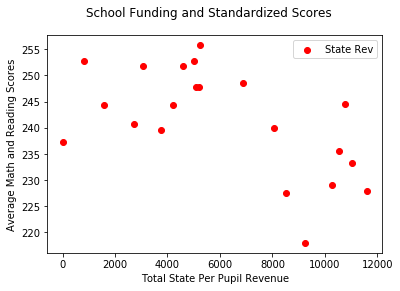

In [43]:
plt.scatter(combined1['TSTREV_PUPIL'], combined1['Avg_Score'], color="red")
plt.legend(["State Rev"])
plt.xlabel("Total State Per Pupil Revenue")
plt.ylabel("Average Math and Reading Scores")
plt.suptitle("School Funding and Standardized Scores")

Text(0.5, 0.98, 'School Funding and Standardized Scores')

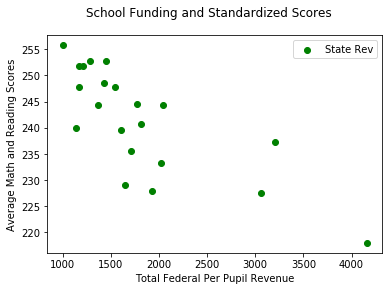

In [44]:
plt.scatter(combined1['TFEDREV_PUPIL'], combined1['Avg_Score'], color="green")
plt.legend(["State Rev"])
plt.xlabel("Total Federal Per Pupil Revenue")
plt.ylabel("Average Math and Reading Scores")
plt.suptitle("School Funding and Standardized Scores")

Race and Standardized Test Scores

Text(0.5, 0.98, 'Racial Background and Scores')

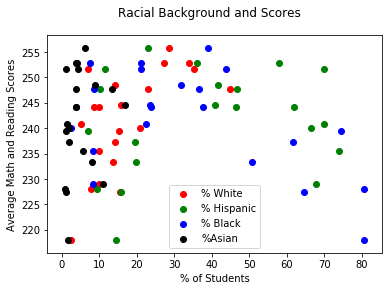

In [45]:
plt.scatter(combined1['%_White'], combined1['Avg_Score'], color = "red")
plt.scatter(combined1['%_Hispanic'], combined1['Avg_Score'], color = "green")
plt.scatter(combined1['%_Black'], combined1['Avg_Score'], color = "blue")
plt.scatter(combined1['%_Asian'], combined1['Avg_Score'], color = "black")
plt.xlabel("% of Students")
plt.ylabel("Average Math and Reading Scores")
plt.legend(["% White", "% Hispanic", "% Black", "%Asian"])
plt.suptitle("Racial Background and Scores")

Other Characteristic and Standardized Test Scores

Text(0.5, 0.98, 'Other District Characteristics and Average Scores')

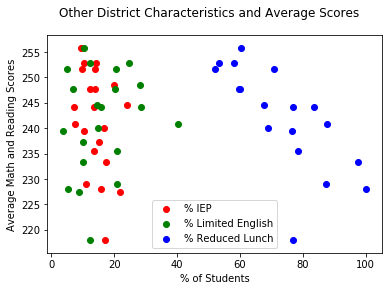

In [46]:
plt.scatter(combined1['%_IEP'], combined1['Avg_Score'], color = "red")
plt.scatter(combined1['%_Lim_Eng'], combined1['Avg_Score'], color = "green")
plt.scatter(combined1['%_Lunch'], combined1['Avg_Score'], color = "blue")
plt.xlabel("% of Students")
plt.ylabel("Average Math and Reading Scores")
plt.legend(["% IEP", "% Limited English", "% Reduced Lunch"])
plt.suptitle("Other District Characteristics and Average Scores")

(array([2., 2., 3., 2., 5., 2., 1., 1., 0., 3.]),
 array([11.1  , 12.307, 13.514, 14.721, 15.928, 17.135, 18.342, 19.549,
        20.756, 21.963, 23.17 ]),
 <a list of 10 Patch objects>)

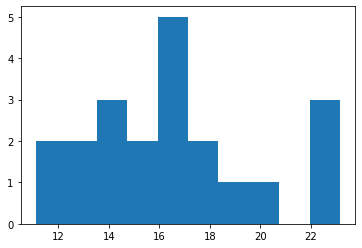

In [47]:
#Misc Chart
plt.hist(combined1['Pupil_Teacher'],bins=10)

## Part III: Regression Analysis

Wealth Model

In [48]:
#Note that smf didn't like some of my variables, so I renamed them along the way

In [49]:
combined1['Lunch'] = combined1['%_Lunch']

In [50]:
wealth_model = smf.ols(formula = 'Avg_Score ~ TLOCREV_PUPIL + Lunch',data=combined1).fit()

In [51]:
wealth_model.summary()

C:\Users\12156\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Avg_Score   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     9.252
Date:                Tue, 24 Dec 2019   Prob (F-statistic):            0.00241
Time:                        20:16:06   Log-Likelihood:                -59.575
No. Observations:                  18   AIC:                             125.1
Df Residuals:                      15   BIC:                             127.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       276.9732      9.753     28.400      0.000     256.186     297.760
TLOCREV_PUPIL     0.0004      0.000      0.773      0.452      -0.001       0.001
Lunch            -0.5092      0.122     -4.171      0.001      -0.769      -0.249
==============================================================================
Omnibus:                       16.514   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.263
Skew:                          -1.561   Prob(JB):                     0.000178
Kurtosis:                       6.642   Cond. No.                     4.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Funding Model

In [52]:
funding_model = smf.ols(formula = 'Avg_Score ~ TLOCREV_PUPIL + TSTREV_PUPIL + TFEDREV_PUPIL',data=combined1).fit()

In [53]:
funding_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Avg_Score   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     21.51
Date:                Tue, 24 Dec 2019   Prob (F-statistic):           5.06e-06
Time:                        20:16:07   Log-Likelihood:                -61.353
No. Observations:                  21   AIC:                             130.7
Df Residuals:                      17   BIC:                             134.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       263.0319      3.609     72.874      0.000     255.417     270.647
TLOCREV_PUPIL     0.0002      0.000      1.058      0.305      -0.000       0.001
TSTREV_PUPIL     -0.0011      0.000     -3.150      0.006      -0.002      -0.000
TFEDREV_PUPIL    -0.0093      0.002     -6.076      0.000      -0.013      -0.006
==============================================================================
Omnibus:                        0.845   Durbin-Watson:                   2.535
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.716
Skew:                          -0.067   Prob(JB):                        0.699
Kurtosis:                       2.105   Cond. No.                     3.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Race Model

In [54]:
combined1['White'] = combined1['%_White']
combined1['Black'] = combined1['%_Black']
combined1['Hispanic'] = combined1['%_Hispanic']
combined1['Asian'] = combined1['%_Asian']
combined1['Other'] = combined1['%_Other']

In [55]:
race_model = smf.ols(formula = 'Avg_Score ~ White + Black + Hispanic + Asian + Other',data=combined1).fit()

In [56]:
race_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Avg_Score   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     5.531
Date:                Tue, 24 Dec 2019   Prob (F-statistic):            0.00543
Time:                        20:16:07   Log-Likelihood:                -68.696
No. Observations:                  21   AIC:                             147.4
Df Residuals:                      16   BIC:                             152.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1127      0.007     15.727      0.000       0.098       0.128
White          3.0204      0.165     18.355      0.000       2.672       3.369
Black          2.2269      0.048     46.102      0.000       2.124       2.329
Hispanic       2.4144      0.053     45.268      0.000       2.301       2.527
Asian          2.4609      0.412      5.977      0.000       1.588       3.334
Other          1.1521      0.916      1.257      0.227      -0.790       3.094
==============================================================================
Omnibus:                        1.263   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                1.135
Skew:                          -0.488   Prob(JB):                        0.567
Kurtosis:                       2.411   Cond. No.                     2.23e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Other Characteristics Model

In [57]:
combined1['IEP'] = combined1['%_IEP']
combined1['Limenglish'] = combined1['%_Lim_Eng']

In [58]:
other_model = smf.ols(formula = 'Avg_Score ~ IEP + Limenglish + Pupil_Teacher',data=combined1).fit()

In [59]:
other_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Avg_Score   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1.307
Date:                Tue, 24 Dec 2019   Prob (F-statistic):              0.305
Time:                        20:16:07   Log-Likelihood:                -75.634
No. Observations:                  21   AIC:                             159.3
Df Residuals:                      17   BIC:                             163.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       265.7008     15.897     16.714      0.000     232.162     299.240
IEP              -0.8524      0.545     -1.564      0.136      -2.002       0.297
Limenglish        0.1143      0.256      0.447      0.661      -0.426       0.654
Pupil_Teacher    -0.8534      0.674     -1.267      0.222      -2.274       0.568
==============================================================================
Omnibus:                        1.813   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.278
Skew:                          -0.369   Prob(JB):                        0.528
Kurtosis:                       2.043   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Final Model

In [60]:
final_model = smf.ols(formula = 'Avg_Score ~ TFEDREV_PUPIL + Lunch',data=combined1).fit()

In [61]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Avg_Score   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     30.72
Date:                Tue, 24 Dec 2019   Prob (F-statistic):           4.96e-06
Time:                        20:16:07   Log-Likelihood:                -52.151
No. Observations:                  18   AIC:                             110.3
Df Residuals:                      15   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       281.6313      6.017     46.805      0.000     268.806     294.456
TFEDREV_PUPIL    -0.0083      0.002     -4.537      0.000      -0.012      -0.004
Lunch            -0.3526      0.088     -3.995      0.001      -0.541      -0.164
==============================================================================
Omnibus:                        0.038   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.132
Skew:                          -0.072   Prob(JB):                        0.936
Kurtosis:                       2.606   Cond. No.                     9.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

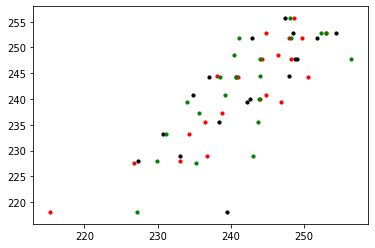

In [62]:
#I tried a predictions graph but it doesn't really make sense, so I excluded it. 
wealth_predictions = wealth_model.predict(combined1)
funding_predictions = funding_model.predict(combined1)
race_predictions = race_model.predict(combined1)

legend =[]

legend.append("Wealth Model")
plt.scatter(wealth_predictions, combined1['Avg_Score'], s=10, color="black")

legend.append("Funding Predictions")
plt.scatter(funding_predictions, combined1['Avg_Score'], s=10, color="red")

legend.append("Race Predictions")
plt.scatter(race_predictions, combined1['Avg_Score'], s=10, color="green")
